In [4]:
! pip install tenserflow

ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


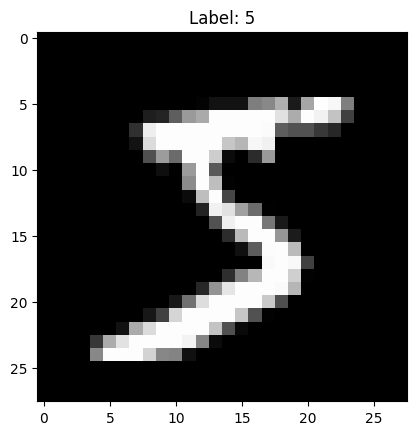

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Loading the MNIST dataset (28x28 grayscale images of handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshaping the data to include the color channel for CNNs
# The original shape is (num_samples, 28, 28), we reshape it to (num_samples, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # Reshape training images
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  # Reshape testing images

# One-hot encode the labels: Converts labels into a binary matrix (e.g., '3' → [0,0,0,1,0,0,0,0,0,0])
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Display a sample image from the training set
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")  # np.argmax(y_train[0]) gives the digit (0-9) from the one-hot encoded label
plt.show()


In [4]:
from tensorflow.keras import layers, models

# Creating a sequential model (a linear stack of layers)
model = models.Sequential()

# Adding the first convolutional layer:
# - 32 filters (number of feature maps)
# - (3, 3) filter size (kernel)
# - 'relu' activation function (introduces non-linearity)
# - input_shape=(28, 28, 1) for grayscale images with 28x28 resolution and 1 color channel
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Adding a MaxPooling layer:
# - Pooling layer with (2, 2) pool size reduces the spatial size of the representation
model.add(layers.MaxPooling2D((2, 2)))

# Adding another convolutional layer:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the 2D matrix into a 1D vector
model.add(layers.Flatten())

# Adding a fully connected layer (Dense layer)
model.add(layers.Dense(128, activation='relu'))

# Output layer with 10 units (one for each class) and softmax activation for multi-class classification
model.add(layers.Dense(10, activation='softmax'))

# Displaying the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8874 - loss: 0.3852 - val_accuracy: 0.9822 - val_loss: 0.0579
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9837 - loss: 0.0524 - val_accuracy: 0.9883 - val_loss: 0.0391
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9894 - loss: 0.0341 - val_accuracy: 0.9885 - val_loss: 0.0388
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9897 - val_loss: 0.0353
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9945 - loss: 0.0177 - val_accuracy: 0.9905 - val_loss: 0.0389
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9952 - loss: 0.0150 - val_accuracy: 0.9892 - val_loss: 0.0410
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9969 - loss: 0.0100 - val_accuracy: 0.9917 - val_loss: 0.0327
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9967 - loss: 0.0093 - val_accuracy: 0

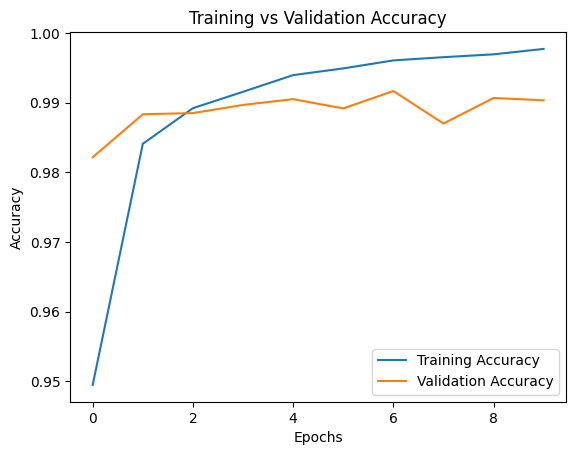

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,  epochs=10, batch_size=64, validation_split=0.1)

# Plotting the training vs validation accuracy over the epochs:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [6]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9856 - loss: 0.0518
Test accuracy: 0.9901999831199646
Test loss: 0.037580456584692


In [8]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


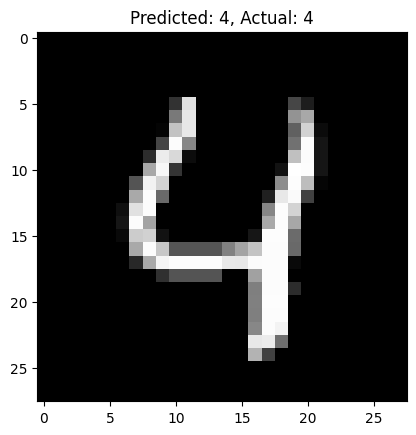

In [17]:
plt.imshow(x_test[4].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[4])}, Actual: {np.argmax(y_test[4])}")
plt.show()

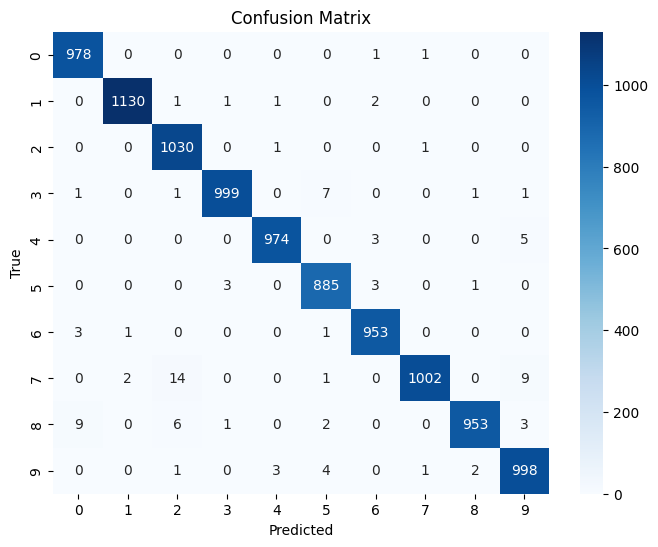

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()